## Preparing A Dataset for Modeling  
### 04-Apr-2019 Lou Pendley  
### Version 1.0

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [16]:
# Let's read in the data set
DataFilePath = '../../../../Datafiles'
df = pd.read_csv(DataFilePath + '/imdb-data-from-2006-to-2016.zip', 
                 compression='zip', header=0, sep=',', quotechar='"')
df['first_genre'] = df['Genre'].apply(lambda x: x.split(',')[0])
df['first_actor'] = df['Actors'].apply(lambda x: x.split(',')[0])
df.rename(index=str, columns={"Revenue (Millions)": "Revenue", "B": "c"}, inplace=True)

In [17]:
# print(df['first_actor'].unique())
sort_by = ['first_actor']

# We will want to group by Station ID: start, and end
df_sorted_actor=pd.DataFrame()
df_sorted_actor=df.sort_values(by=sort_by, ascending=False)
# print(df_sorted_actor)
df_sorted_actor.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue', 'Metascore',
       'first_genre', 'first_actor'],
      dtype='object')

In [6]:
df_sorted_genre = df.sort_values(by=['first_genre'])
print("there are {} distinct genres.".format(len(df_sorted_genre['first_genre'].unique())))
for name in df_sorted_genre['first_genre'].unique():
    print("first genre is {}".format(name))

there are 13 distinct genres.
first genre is Action
first genre is Adventure
first genre is Animation
first genre is Biography
first genre is Comedy
first genre is Crime
first genre is Drama
first genre is Fantasy
first genre is Horror
first genre is Mystery
first genre is Romance
first genre is Sci-Fi
first genre is Thriller


In [7]:
i = 1
top = 20
df_sorted_first_actor = df.sort_values(by=['first_actor'])
print("there are {} distinct first actors.".format(len(df_sorted_first_actor['first_actor'].unique())))
print("Here are the top {} in alphabetical first name order.".format(top))
for name in df_sorted_first_actor['first_actor'].unique()[0:top]:
    print("first actor number {} is {}".format(i, name))
    i += 1

there are 525 distinct first actors.
Here are the top 20 in alphabetical first name order.
first actor number 1 is Aamir Khan
first actor number 2 is Aaron Paul
first actor number 3 is Aaron Poole
first actor number 4 is Aaron Taylor-Johnson
first actor number 5 is Abbie Cornish
first actor number 6 is Abigail Breslin
first actor number 7 is Adam Driver
first actor number 8 is Adam Pally
first actor number 9 is Adam Sandler
first actor number 10 is Adrian Grenier
first actor number 11 is Adrian Titieni
first actor number 12 is Adrien Brody
first actor number 13 is Alex Karpovsky
first actor number 14 is Alex Pettyfer
first actor number 15 is Alexander Skarsgård
first actor number 16 is Alexandra Daddario
first actor number 17 is Alexi Pappas
first actor number 18 is Alia Bhatt
first actor number 19 is Alia Shawkat
first actor number 20 is Alice Englert


In [8]:
grouping_columns = ['first_actor']
sort_by_aggregate = ['count']

# # We will want to group by first actor
df_first_actor_grouped=df.groupby(grouping_columns )['first_actor'].agg(['count']) 
df_first_actor_grouped=df_first_actor_grouped.sort_values(by=sort_by_aggregate, ascending=False)
print(df_first_actor_grouped)

                     count
first_actor               
Christian Bale          11
Mark Wahlberg           11
Denzel Washington        9
Jake Gyllenhaal          9
Leonardo DiCaprio        9
Brad Pitt                9
Adam Sandler             9
Will Smith               9
Tom Hardy                8
Johnny Depp              8
Daniel Radcliffe         8
Robert Downey Jr.        8
Tom Hanks                8
Jennifer Lawrence        7
Matt Damon               7
Matthew McConaughey      7
Michael Fassbender       7
Tom Cruise               7
Channing Tatum           7
George Clooney           6
Hugh Jackman             6
Seth Rogen               6
Ben Affleck              6
Jesse Eisenberg          6
Vin Diesel               6
Chris Pine               6
Kristen Stewart          6
Will Ferrell             6
Sylvester Stallone       6
Chris Hemsworth          6
...                    ...
Florence Pugh            1
Fionn O'Shea             1
Fiona Gordon             1
Ferdia Walsh-Peelo       1
H

In [9]:
grouping_columns = ['first_genre']
sort_by_aggregate = ['count']

# # We will want to group by first genre
df_first_genre_grouped=df.groupby(grouping_columns )['first_actor'].agg(['count']) 
df_first_genre_grouped=df_first_genre_grouped.sort_values(by=sort_by_aggregate, ascending=False)
print(df_first_genre_grouped)

             count
first_genre       
Action         293
Drama          195
Comedy         175
Adventure       75
Crime           71
Biography       64
Animation       49
Horror          46
Mystery         13
Thriller        10
Fantasy          4
Sci-Fi           3
Romance          2


## Let's do the Univariate analysis

1. How many variables do I have?  

|Variable|Type|:Clean Data|To Use?|
|:----------|:-------|:-------|:-----|
|Rank|Continuous Ratio|Yes|No| 
|Title|Other|Yes|No|
|Genre|Categorical|Yes|Yes(first_genre)|
|Description|Other|Yes|No|
|Director|Categorical|Yes|Yes|
|Actors|Categorical|Yes|Yes(first_actor)|
|Year|Continuous: Ratio|Yes|No|
|Runtime(minutes)|Continuous: Ratio|Yes|No|
|Rating|Categorical|Yes|Yes|
|Votes|Continuous: Interval|Yes|Yes|
|Revenue|Continuous: Ratio|Yes|Yes|
|Metascore|Continuous: Ratio|Yes|Yes|


1. How many data points?
    1.  We have 1,000 movies in this dataset
1. Which variables are categorical, and which are continuous?
    1. See table 1 above.
1. Do any of my variables have a known probability distribution?
1. Do I have missing data?
    1. If so, how much?
1. How much variance is there in each of my variables?

Do some visualizations of the variables we are going to use.

In [ ]:
cont_variable_list = ['Rating', 'Votes', 'Revenue', 'Metascore']

In [44]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
# printmd('**bold**')

**bold**

variable=**Rating**, mean=6.72, std_dev=0.95

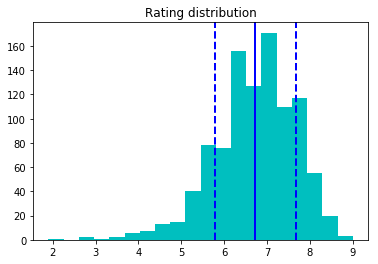

variable=**Votes**, mean=169808.26, std_dev=188762.65

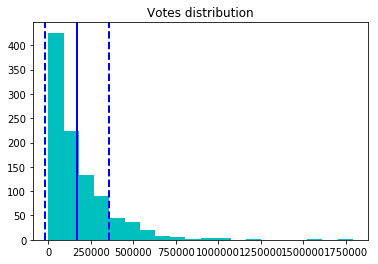

variable=**Revenue**, mean=82.96, std_dev=103.25

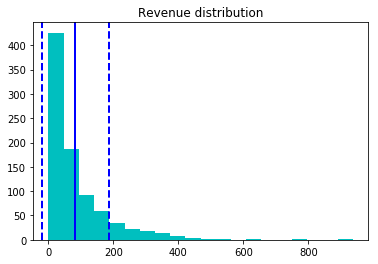

variable=**Metascore**, mean=58.99, std_dev=17.19

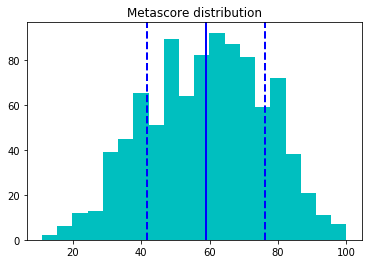

In [45]:
print("\n\n")

for var in cont_variable_list:
    printmd("variable=**{}**, mean={:0.2f}, std_dev={:0.2f}".format(var,df[var].mean(),df[var].std()))
    
    mean = df[var].mean()
    std = df[var].std()

    plt.title(var+' distribution', fontdict=None, loc='center', pad=None)
    #Plot a histogram for rand1.
    plt.hist(df[var], bins=20, color='c')

    # Add a vertical line at the mean.
    plt.axvline(mean, color='b', linestyle='solid', linewidth=2)

    # Add a vertical line at one standard deviation above the mean.
    plt.axvline(mean + std, color='b', linestyle='dashed', linewidth=2)

    # Add a vertical line at one standard deviation below the mean.
    plt.axvline(mean-std, color='b', linestyle='dashed', linewidth=2) 

    # Print the histogram.
    plt.show()
    print("\n\n")

## To do's  
1.  Plot each variable
1.  Describe each variable we are going to use
1. 

## Let's do the Bivariate analysis

In [46]:
print("Let's do the Bivariate analysis!")

Let's do the Bivariate analysis!
